<a href="https://colab.research.google.com/github/mdainur/kbtu-ml-book/blob/mlp-layers/mlp/layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Layers of MLP

The prediction formula for deep learning is linear itself. But each of its terms is also a linear hypothesis made up in their turn of terms that are also a linear hypothesis.  This linear embedding process of many linear hypotheses is quite powerful. So, we can overcome the limitations of linear models by integrating one or more hidden layers.

```{figure} https://d1jnx9ba8s6j9r.cloudfront.net/blog/wp-content/uploads/2017/09/Multi-Layer-Perceptron-Neural-Network-Tutorial-Edureka.png
:align: center
```
From the mathematical point of view, MLP is a smooth function $F$ which is constructed as a composition of some other functions

$$
F(\boldsymbol x) = (f_{L} \circ f_{L-1} \circ\ldots \circ f_2 \circ f_1)(\boldsymbol x),\quad
\boldsymbol x \in \mathbb R^{n_0}
$$

Each function

$$
    f_\ell \colon \mathbb R^{n_{\ell - 1}} \to \mathbb R^{n_\ell}
$$

is called a **layer**; it converts representation of $(\ell-1)$-th layer

$$
    \boldsymbol x_{\ell -1} \in \mathbb R^{n_{\ell - 1}}
$$

to the representation of $\ell$-th layer

$$
   \boldsymbol x_{\ell} \in \mathbb R^{n_{\ell}}.
$$

Thus, the **input layer** $\boldsymbol x_0 \in \mathbb R^{n_0}$ is converted to the **output layer** $\boldsymbol x_L \in \mathbb R^{n_L}$. All other layers $\boldsymbol x_\ell$, $1\leqslant \ell < L$, are called **hidden layers**. If an MLP has two or more hidden layers, it is called a deep neural network.

```{warning}
The terminology about layers is a bit ambiguous. Both functions $f_\ell$ and their outputs $\boldsymbol x_\ell = f(\boldsymbol x_{\ell - 1})$ are called $\ell$-th layer in different sources.
```



## Parameters of MLP

However, one important element is missing in this description of MLP: parameters! Each layer $f_\ell$ has a vector of parameters $\boldsymbol \theta_\ell\in\mathbb R^{m_\ell}$ (sometimes empty). Hence, a layer should be defined as

$$
    f_\ell \colon \mathbb R^{n_{\ell - 1}} \times \mathbb R^{m_\ell} \to \mathbb R^{n_\ell}.
$$

The representation $\boldsymbol x_\ell$ is calculated from $\boldsymbol x_{\ell -1}$ by the formula

$$
\boldsymbol x_\ell = f_\ell(\boldsymbol x_{\ell - 1},\boldsymbol \theta_\ell)
$$

with some fixed $\boldsymbol \theta_\ell\in\mathbb R^{m_\ell}$. The whole MLP $F$ depends on parameters of all layers:

$$
    F(\boldsymbol x, \boldsymbol \theta), \quad \boldsymbol \theta = (\boldsymbol \theta_1, \ldots, \boldsymbol \theta_L).
$$

All these parameters are trained simultaneously by the {ref}`backpropagation method <backprop>`.




## Linear layer

Edges between two consequetive layers denote **linear** (or **dense**) layer:

$$
    \boldsymbol x_\ell = f(\boldsymbol x_{\ell - 1}; \boldsymbol W, \boldsymbol b) = \boldsymbol {Wx}_{\ell - 1} + \boldsymbol b.
$$

The matrix $\boldsymbol W \in \mathbb R^{n_{\ell - 1}\times n_\ell}$ and vector $\boldsymbol b \in \mathbb R^{n_\ell}$ (bias) are parameters of the linear layer which defines the linear transformation from $\boldsymbol x_{\ell - 1}$ to $\boldsymbol x_{\ell}$.

````{admonition} Exercise
:class: important
Suppose that we apply one more linear layer:

$$
    \boldsymbol x_{\ell + 1} = \boldsymbol {W'x}_{\ell} + \boldsymbol{b'}
$$

Express $\boldsymbol x_{\ell + 1}$ as a function of $\boldsymbol x_{\ell - 1}$.

```{admonition} Answer
:class: tip, dropdown

Assuming the expression for $\boldsymbol{x}_{\ell}$ as:

$$
\boldsymbol{x}_{\ell} = \boldsymbol{Wx}_{\ell - 1} + \boldsymbol{b}
$$

Now, substituting this into the equation for $\boldsymbol{x}_{\ell + 1}$, we get:

$$
\boldsymbol{x}_{\ell + 1} = \boldsymbol{W'x}_{\ell} + \boldsymbol{b'}
$$

$$
\boldsymbol{x}_{\ell + 1} = \boldsymbol{W'(Wx}_{\ell - 1} + \boldsymbol{b}) + \boldsymbol{b'}
$$

So, the expression for $\boldsymbol{x}_{\ell + 1}$ in terms of $\boldsymbol{x}_{\ell - 1}$ is:

$$
\boldsymbol{x}_{\ell + 1} = \boldsymbol{W'Wx}_{\ell - 1} + \boldsymbol{W'b} + \boldsymbol{b'}
$$

```
````

In [ ]:
!pip install jupyterquiz

In [ ]:
# @title
import json
from jupyterquiz import display_quiz
display_quiz("https://raw.githubusercontent.com/teslasama/specialforumlf/main/question2.json")

<IPython.core.display.Javascript object>

In [ ]:
# @title
display_quiz("https://raw.githubusercontent.com/teslasama/specialforumlf/main/question1.json")

<IPython.core.display.Javascript object>

### Linear layer in PyTorch

In [ ]:
import torch

x = torch.randn(5)
x

tensor([1.6775, 0.9829, 0.6924, 0.4259, 0.3071])

Weights:

In [ ]:
linear_layer = torch.nn.Linear(5, 6)
linear_layer.weight

Parameter containing:
tensor([[-0.3714, -0.2333, -0.1655, -0.4462, -0.0368],
        [ 0.2493,  0.0998, -0.1157, -0.0197,  0.1811],
        [-0.1258, -0.3115,  0.1905,  0.0492,  0.2146],
        [-0.2193,  0.1704, -0.4441, -0.4437,  0.1580],
        [ 0.0774,  0.1675, -0.1123,  0.1158, -0.2857],
        [ 0.0673,  0.3568, -0.0544,  0.3065, -0.0552]], requires_grad=True)

Apply the linear transformation:

In [ ]:
linear_layer(x)

tensor([-1.3228,  0.6315, -0.2395, -0.3542,  0.2405,  0.6446],
       grad_fn=<ViewBackward0>)

## Activation layer

The perceptron computes a single output from multiple real-valued inputs by forming a linear combination according to its input weights and then possibly putting the output through some nonlinear **activation function**. Mathematically this can be written as

$$
    \boldsymbol x_i^{\mathsf T} = \psi_i(\boldsymbol x_{i-1}^{\mathsf T} \boldsymbol W_{i} + \boldsymbol b_{i})
$$

where, $\boldsymbol\psi$ is the activatiion function.

```{warning}
Note that different layers may have different activation functions.
```

The original Rosenblatt's perceptron used a Heaviside step function

$$
    \mathbb H(x) = \begin{cases}
        1,& \text{if }  x \geqslant 0, \\
        0,& \text{if }  x < 0.
    \end{cases}
$$

as the activation function $\boldsymbol\psi$. While the value of “1” triggers the activation function and “0” does not. If there exists more than one layer,a value of “1” will be configured to pass the output to the input of the next layer. Consequently, a “0” value is configured to be ignored and will not be passed to the next processor.


Nowadays, and especially in multilayer networks, the activation function is often chosen to be the rectified linear unit (ReLU) function:

$$
ReLU(x) = (x)^{\mathsf +}=max(0,x)
$$

This function is used because of both its simplicity of implementation and its good performance on a variety of predictive tasks. ReLU provides a very simple nonlinear transformation.

We will discover activation functions in more detail in the  {ref}`activation functions <activations>`.

In [ ]:
# @title
display_quiz("https://raw.githubusercontent.com/teslasama/specialforumlf/main/question4.json")

<IPython.core.display.Javascript object>

### ReLU function in PyTorch

In [ ]:
import torch

x = torch.linspace(-10, 10, 20)
x

tensor([-10.0000,  -8.9474,  -7.8947,  -6.8421,  -5.7895,  -4.7368,  -3.6842,
         -2.6316,  -1.5789,  -0.5263,   0.5263,   1.5789,   2.6316,   3.6842,
          4.7368,   5.7895,   6.8421,   7.8947,   8.9474,  10.0000])

Apply and plot the ReLU function:

In [ ]:

y = torch.relu(x)
y


tensor([ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.5263,  1.5789,  2.6316,  3.6842,  4.7368,  5.7895,
         6.8421,  7.8947,  8.9474, 10.0000])

In [ ]:
!pip install matplotlib

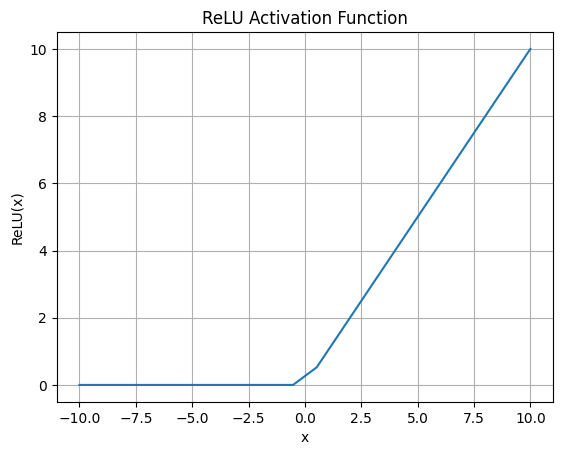

In [ ]:
plt.plot(x.numpy(), y.numpy())
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.title('ReLU Activation Function')
plt.grid(True)
plt.show()

## MLP working process



```{figure} https://yastatic.net/s3/ml-handbook/admin/16_2_a93003bf17.png
```
Let's figure out what's going on here:

* Input is the input of the neural network that receives the source data. Usually, it is required that they have the form of a matrix or a tensor (multidimensional matrix). Generally, there may be various inputs: for example, we can submit a picture and some other information about it to the neural network - we will transform them in different ways.
* Further to the source data $X_0$ two linear layers are applied, which turn them into intermediate (internal, hidden) representations $X_1$ and $X_2$, they are also called activations (not to be confused with activation functions).
* Each of the performances $X_1$ and $X_2$ is subjected to non-linear transformation, turning into new intermediate representations $X_3$ and $X_4$ respectively. Transition from $X_0$ to new matrices (or tensors) $X_3$ and $X_4$ can be considered as the construction of more informative feature descriptions of the original data.
* Then, representations $X_3$ and $X_4$ are concatenated, meaning the feature descriptions of all objects are merged.
* Then there is another activation, and the result gets to the network output, that is, it is given back to the user.

A neural network that has only linear layers and various activation functions is called a fully connected neural network or multilayer perceptron (MLP).

## Why to use nonlinearity?

Let's demonstrate that augmenting layers in a linear deep network, specifically one lacking nonlinearity(activation function), does not enhance the network's expressive capacity.

Consider a single-layer linear network

$$y=Wx$$

Now, if we add another identical linear layer, it will look like this

$$y=W(Wx)=W^2x$$

Let's visualize the concept with a graphical representation:

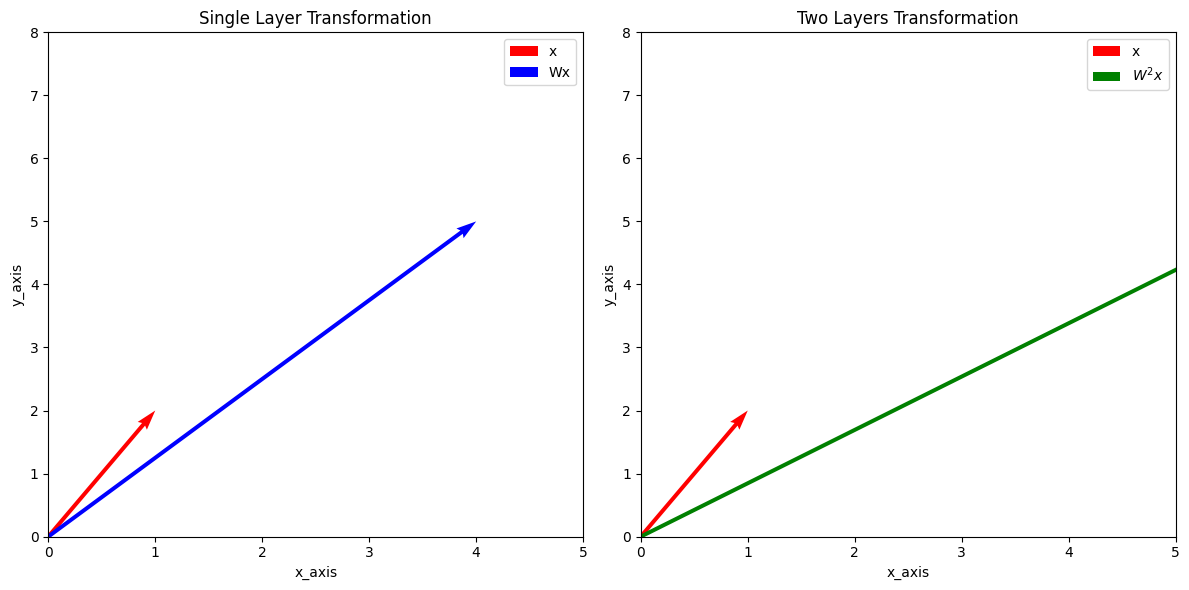

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define a linear transformation matrix
transformation_matrix = np.array([[2, 1],
                                   [-1, 3]])

# Input vector
input_vector = np.array([1, 2])

# Single-layer linear transformation
output_single_layer = np.dot(transformation_matrix, input_vector)

# Two-layer linear transformation
transformation_matrix_double_layer = np.dot(transformation_matrix, transformation_matrix)
output_double_layer = np.dot(transformation_matrix_double_layer, input_vector)

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.quiver(0, 0, input_vector[0], input_vector[1], angles='xy', scale_units='xy', scale=1, color='r', label='x')
plt.quiver(0, 0, output_single_layer[0], output_single_layer[1], angles='xy', scale_units='xy', scale=1, color='b', label='Wx')
plt.title('Single Layer Transformation')
plt.xlabel('x_axis')
plt.ylabel('y_axis')
plt.xlim(0, 5)
plt.ylim(0, 8)
plt.legend()

plt.subplot(1, 2, 2)
plt.quiver(0, 0, input_vector[0], input_vector[1], angles='xy', scale_units='xy', scale=1, color='r', label='x')
plt.quiver(0, 0, output_double_layer[0], output_double_layer[1], angles='xy', scale_units='xy', scale=1, color='g', label='$W^2x$')
plt.title('Two Layers Transformation')
plt.xlabel('x_axis')
plt.ylabel('y_axis')
plt.xlim(0, 5)
plt.ylim(0, 8)
plt.legend()

plt.tight_layout()
plt.show()


It's also worth mentioning that adding more layers could potentially lead to numerical instability due to large weight values, which might be another reason to avoid deep linear networks without nonlinearity. Nonlinear activation functions (like ReLU, sigmoid, etc.) are crucial for introducing complexity and enabling the network to learn and represent more intricate relationships in the data.